# Exploratory Data Analysis for House Price Prediction, a Kaggle Project 
Created on September 4, 2024 

Author: Xin (David) Zhao 


## Introduction and Objectives

This notebook presents an exploratory data analysis (EDA) of the House Price dataset from Kaggle, which is designed to predict the final sale price of residential homes in Ames, Iowa. The dataset comprises 79 explanatory variables that capture a wide range of characteristics influencing the value of each property, from its physical attributes to neighborhood features.

The primary objectives of this EDA are:

- Understanding the Data: Familiarizing with the structure, types, and summary statistics of the dataset to build a solid foundation for further analysis.

- Identifying Patterns: Recognizing key trends and relationships within the data that could contribute to more accurate predictions.

- Detecting Anomalies: Spotting any inconsistencies or outliers that may affect the robustness of the predictive models.

Generating Insights: Extracting useful insights that can inform data preprocessing and feature engineering steps, ensuring the data is well-prepared for machine learning applications.

By achieving these objectives, this analysis will serve as a critical step toward building an effective model for predicting house prices and enhancing our understanding of the factors that drive property values in Ames, Iowa.

## Data Import and Description

## Importing Modules 

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # for making plots 
import seaborn as sns # for making plots with seaborn 

import scipy # for statistical analysis
from scipy.stats import chi2_contingency  
from scipy.stats import ttest_ind  
from scipy.stats import pearsonr # Pearson Correlation 
from scipy import stats # Module for T-test and ANOVA 

import statsmodels.api as sm # Module for OLS Regression 
from statsmodels.formula.api import ols  # Module for OLS Regression 
from sklearn.impute import SimpleImputer # Module for imputing missing values 

from ipywidgets import Button, Output # Module for creating buttons 
from IPython.display import display # Module for displaying widgets

Virtual Python Environment: base (Python 3.12.4)

## Importing the Dataset

The dataset consists of two files: train.csv and test.csv.
- train.csv: 1460 observations, 81 columns, with the target variable being the SalePrice column.
- test.csv: 1459 observations, 80 columns, containing the test data.

The first step is to load the train.csv file and examine its contents.

In [64]:
# Read the training data 
train_df = pd.read_csv('data/train.csv') 
# Drop Id column
train_df = train_df.drop(columns = ['Id']) 

In [65]:
# Inspect first few rows of the datat
train_df.head(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [66]:
# Inspect the data structure 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

The training dataset consists of 1460 observations and 81 columns, including the target variable SalePrice. The columns represent various property features, such as the number of bedrooms, bathrooms, and other attributes that may influence the sale price.

The dataset includes different types of variables: numerical, categorical, and ordinal. Some variables contain missing values that will need to be handled during data preprocessing.

### Descriptive Statistics of the Target Variable: SalePrice

In [67]:
# Description of the target variable
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

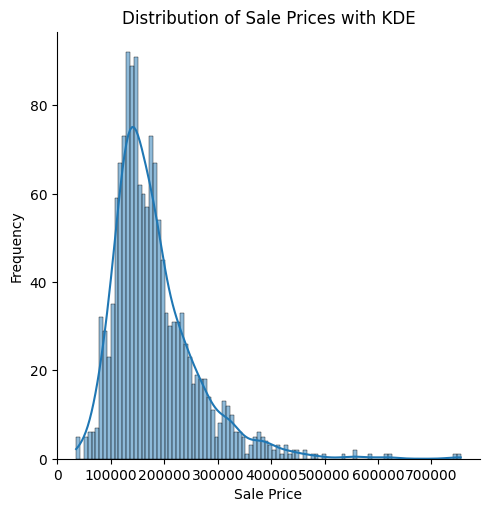

In [68]:
# Histogram of the target variable with kernel density estimation (KDE)
sns.displot(train_df['SalePrice'], kde=True, bins=100)  

# Display the plot
plt.title('Distribution of Sale Prices with KDE')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

The descriptive statistics of the target variable are as follows:
- Mean: $180,921.20
- Standard Deviation: $79,442.50
- Minimum: $34,900.00
- 25th Percentile: $129,975.00
- Median: $163,000.00
- 75th Percentile: $214,000.00
- Maximum: $755,000.00

In general, the target variable, SalePrice, is right-skewed. The mean is greater than the median, which indicates that the distribution is positively skewed. The minimum value is $34,900.00, while the maximum value is $755,000.00. The standard deviation is $79,442.50, which indicates that the data points are spread out from the mean.


# Data Cleaning and Preprocessing

## Inspect Missing Values 
First, we will examine the missing values in the dataset to determine the extent of missing data and decide on the appropriate handling strategy.


In [69]:
# Check for missing values 
pd.isna(train_df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Identifying Missing Values: The dataset contains missing values that need to be addressed before proceeding with the analysis. The missing values are distributed across multiple columns, with varying degrees of completeness. The next step is to investigate the missing values in more detail and determine the appropriate imputation strategy.

In [70]:
# Summary of missing values counts in each variable 
missing_list = pd.isna(train_df).agg(lambda x: np.sum(x)) 

# Display only variables that have missing values and counts 
var_with_na = list(missing_list[missing_list > 0].index) 
count_na = list(missing_list[missing_list > 0].values) 

# Create a directory with key and value representing positive variables and NA counts 
dict_na = dict(zip(var_with_na, count_na)) 

In [71]:
# Create a data frame with columns, including variable name, NA counts, and NA percentage 
df_series = {
    "variable": dict_na.keys(),
    "na_count": dict_na.values() 
}

df_na = pd.DataFrame(df_series)

# Add a column na_percent 
unique_id_count = train_df.shape[0]
df_na["na_percent"] = df_na["na_count"] / unique_id_count * 100 

print(df_na.sort_values(by="na_percent"))

        variable  na_count  na_percent
9     Electrical         1    0.068493
3     MasVnrArea         8    0.547945
4       BsmtQual        37    2.534247
5       BsmtCond        37    2.534247
7   BsmtFinType1        37    2.534247
6   BsmtExposure        38    2.602740
8   BsmtFinType2        38    2.602740
15    GarageCond        81    5.547945
14    GarageQual        81    5.547945
13  GarageFinish        81    5.547945
12   GarageYrBlt        81    5.547945
11    GarageType        81    5.547945
0    LotFrontage       259   17.739726
10   FireplaceQu       690   47.260274
2     MasVnrType       872   59.726027
17         Fence      1179   80.753425
1          Alley      1369   93.767123
18   MiscFeature      1406   96.301370
16        PoolQC      1453   99.520548


The dataset contains missing values in 19 explanatory variables. Among these, the variables with the most missing values (>50% missingness) are:
- PoolQC (99.52% missing): Pool quality
- MiscFeature (96.30% missing): Miscellaneous feature not covered in other categories 
- Alley (93.77% missing): Type of alley access to property
- Fence (80.75% missing): Fence quality 

These variables have the highest proportion of missing data and will require attention during the data preprocessing phase.

In [72]:
# Add a column "datatype" 
data_type = train_df.dtypes  # Check data types of variables 
df_datatype = pd.DataFrame(data_type)
df_datatype_reset = df_datatype.reset_index() # Change index into a column 
df_datatype_reset = df_datatype_reset.rename(columns={"index": "variable", 0: "datatype"})  # Update column name 

# Join df_datatype_reset and df_na on variable 
df_na_datatype = pd.merge(df_na, 
                          df_datatype_reset, 
                          on="variable", 
                          how="left") 

df_na_datatype.sort_values(by="na_percent")

,variable,na_count,na_percent,datatype
9,Electrical,1,0.068493,object
3,MasVnrArea,8,0.547945,float64
4,BsmtQual,37,2.534247,object
5,BsmtCond,37,2.534247,object
7,BsmtFinType1,37,2.534247,object
6,BsmtExposure,38,2.602740,object
8,BsmtFinType2,38,2.602740,object
15,GarageCond,81,5.547945,object
14,GarageQual,81,5.547945,object
13,GarageFinish,81,5.547945,object


## Handling Missing Data 

To handle missing values, I use the following strategy: 
- For numeric variables:
  - Impute missing values with the median if missingness is less than 30%.
  - Drop the variable if missingness exceeds 30%.
- For categorical variables:
  - Impute missing values using the mode (most frequent value).

In [73]:
# Find categorical variable (aka object)
na_object_index = df_na_datatype["datatype"] == "object"
na_object_variables = df_na_datatype[na_object_index]["variable"].tolist()
non_object_variables = df_na_datatype["datatype"] != "object" 
# Store the remaining variables into a list 
df_na_float = df_na_datatype[non_object_variables] 

na_float_variables = df_na_float["variable"].values.tolist()

Impute missing values for categorical variables using the mode (most frequent value).

In [74]:
mode_imputer = SimpleImputer(strategy="most_frequent") 
train_df[na_object_variables] = mode_imputer.fit_transform(train_df[na_object_variables]) 

In [75]:
sum_na = pd.isna(train_df).agg(lambda x: np.sum(x))  # NA counts before filling  
sum_na[sum_na != 0] # Check variables with missing values

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

For numeric variables (float or int), fill missing values with the median if missingness is less than 30%.

In [76]:
# Replace missing values in numerical variables with median
numerical_variables = df_na_float["variable"].values.tolist()
train_df[numerical_variables] = train_df[numerical_variables].fillna(train_df[numerical_variables].median(skipna=True))

# print(train_df_dropna) 
sum_na2 = pd.isna(train_df).agg(lambda x: np.sum(x))  # NA counts after filling 
sum_na2[sum_na2 != 0] # Check variables with missing values 

# Check the data structure after imputing missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In summary, I imputed 16 categorical variables with modes and filled 3 numeric variables with the median. The resulting data frame, `train_df` is free of missing values, and contains 1460 observations and 79 explanatory variables. 

## Identifying and Handling Duplicates
Check for and remove duplicate rows. 

In [77]:
# Check for and remove duplicate rows
train_df.index.is_unique 

True

In [78]:
# Check for and remove duplicate columns 
train_df.columns.is_unique

True

In summary, there are no duplicate rows and columns in the dataset.

## Outlier detection and handling


Investigate potential outliers in numeric variables using the 1.5IQR method. Data points below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers.

In [79]:
# Create a function to detect outliers 
def detect_outlier(var):
    # Calculate IQR based on the list, x 
    q1 = np.quantile(var, 0.25)
    q3 = np.quantile(var, 0.75)
    iqr = q3 - q1 

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr 
    
    outlier = [True if x > upper_bound or x < lower_bound else False for x in var] 

    return outlier 


In [80]:
# Apply the above function to each numeric variable, and store results in a new data frame 
df_outlier = train_df.select_dtypes(include=[np.number]).apply(detect_outlier) 

# Calculate count of outliers in a sample
outlier_count = df_outlier.iloc[:, 1:].sum(axis=1, skipna=True) 

# Sort the series 
sorted_outlier_count = outlier_count.sort_values(ascending=False) 

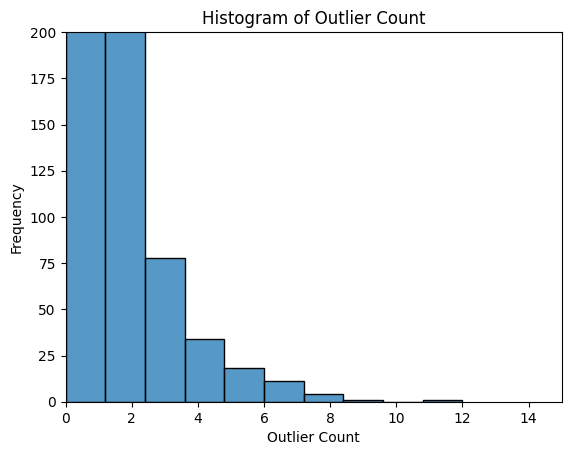

In [81]:
# Draw a histogram to represent outlier count 
sns.histplot(sorted_outlier_count, bins=10)

# Zoom in 0 - 200 in y axis 
plt.ylim(0, 200) 
plt.xlim(0, 15)
plt.xlabel("Outlier Count")
plt.ylabel("Frequency")
plt.title("Histogram of Outlier Count")
plt.show()

Identify properties with more than 10 outliers by counting the number of outliers for each property. Properties with more than 10 outliers (based on the 1.5*IQR method) will be flagged for further investigation.

In [82]:
# Identify sample ID with more than 10 outliers 
sample_many_outliers = sorted_outlier_count[sorted_outlier_count >= 5].index
sample_many_outliers_list = sample_many_outliers.to_list() 

# Drop samples with 10 or more outliers with index sample_many_outliers_list 
train_df_dropna_clean2 = train_df.drop(index=sample_many_outliers_list)

print(train_df_dropna_clean2.shape)  # Check the shape of the data frame

(1425, 80)


In summary, the resulting dataset, `train_df_dropna_clean2`, contains 1425 observations and 79 explanatory variables. It is free of missing values and outliers. The data is now ready for further analysis and modeling.

I want to verify the training dataset before and after outlier removal using NMDS (Non-metric Multidimensional Scaling) to visualize the data distribution. NMDS is a dimensionality reduction technique that can help visualize the similarity between data points in a lower-dimensional space. By comparing the NMDS plots before and after outlier removal, we can assess the impact of outlier removal on the data distribution.

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
import seaborn as sns
import matplotlib.pyplot as plt


In [84]:
# Handle categorical data - convert to numeric using one-hot encoding
train_df_encoded = pd.get_dummies(train_df, drop_first=True)  # Before outlier removal 
train_df_dropna_clean2_encoded = pd.get_dummies(train_df_dropna_clean2, drop_first=True)  # After outlier removal 

In [85]:
# Standardize the numerical data
scaler = StandardScaler()
train_df_encoded_scaled = scaler.fit_transform(train_df_encoded)  # Before outlier removal 
train_df_dropna_clean2_encoded_scaled = scaler.fit_transform(train_df_dropna_clean2_encoded)  # After outlier removal 

In [86]:
# Calculate the Euclidean distance matrix 
distance_matrix = pairwise_distances(train_df_encoded_scaled, metric='euclidean')  # Before outlier removal
distance_matrix2 = pairwise_distances(train_df_dropna_clean2_encoded_scaled, metric='euclidean')  # After outlier removal  

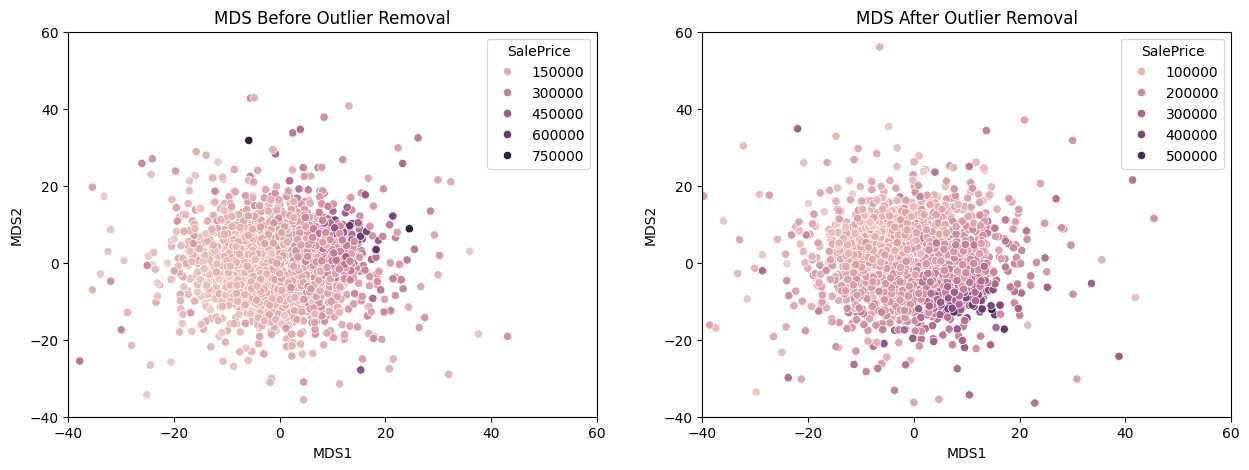

In [87]:
# Perform MDS on the distance matrix
mds = MDS(n_components=2, dissimilarity='precomputed') # Before outlier removal 
train_df_encoded_mds = mds.fit_transform(distance_matrix)  # Before outlier removal 

mds2 = MDS(n_components=2, dissimilarity='precomputed') # After outlier removal
train_df_dropna_clean2_encoded_mds = mds2.fit_transform(distance_matrix2)  # After outlier removal 

# Create a data frame with MDS results
df_mds = pd.DataFrame(train_df_encoded_mds, columns=['MDS1', 'MDS2']) # Before outlier removal
df_mds2 = pd.DataFrame(train_df_dropna_clean2_encoded_mds, columns=['MDS1', 'MDS2']) # After outlier removal 

# Add SalePrice to the data frame
df_mds['SalePrice'] = train_df['SalePrice'].values # Before outlier removal 
df_mds2['SalePrice'] = train_df_dropna_clean2['SalePrice'].values # After outlier removal 

# Scatter plot of MDS1 and MDS2 with SalePrice as hue 
# Combine the two scatter plots - before and after outlier removal 
# Make x-axis and y-axis the same range in two plots 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df_mds, x='MDS1', y='MDS2', hue='SalePrice', ax=axes[0])
axes[0].set_title('MDS Before Outlier Removal')
axes[0].set_xlim(-40, 60)
axes[0].set_ylim(-40, 60)

sns.scatterplot(data=df_mds2, x='MDS1', y='MDS2', hue='SalePrice', ax=axes[1])
axes[1].set_title('MDS After Outlier Removal')
axes[1].set_xlim(-40, 60)
axes[1].set_ylim(-40, 60)

plt.show()


# Exploratory Analysis

## Correlation Analysis

### Correlation Between Sale Prices and Categorical Variables

To identify independent, categorial variables that are predictive of the target outcome, I applied T-test and ANOVA to two- and multiple-group variables, respectively, which produced p-values for each variable. 

To further assess strength of the relationship, I calculated the effect size using Cohen's d for two-group variables and eta-squared for multiple-group variables. 

In [88]:
# Identify categorical variables 
categorical_vars = train_df_dropna_clean2.select_dtypes(include=['object', 'category']) 

# Check data types for all the features 
data_types_features = train_df_dropna_clean2.dtypes

# Distribution of data types 
data_types_features.value_counts() 

# Extract categorical variables 
categorical_vars_df = train_df_dropna_clean2.select_dtypes(include=['object']) 

In [89]:
# Use T-test to compare sales price between two groups 
class_n = categorical_vars_df.nunique()
class_n_df = class_n.to_frame(name="n_groups")

# Identify variables (index) which has only two groups, and store binary variable names into a list 
binary_variables = class_n_df.index[class_n_df["n_groups"] == 2].to_list()
# Store the rest multi-class variable names into a list 
multiclass_variables = class_n_df.index[class_n_df["n_groups"] > 2].to_list()

In [90]:
# Write a function to implement T-test for binary variable and sales price 
def ttest_sales_prices(df, binary_var, target_var='SalePrice'):
    # Split the data into two groups based on the binary variable
    group1 = df[df[binary_var] == df[binary_var].unique()[0]][target_var]
    group2 = df[df[binary_var] == df[binary_var].unique()[1]][target_var]

    # Perform T-test 
    t_stat, p_value = ttest_ind(group1, group2)

    return t_stat, p_value

In [91]:
# Apply the defined function on binary variables and cleaned data set 
ttest_results = []
for var in binary_variables:
    t_stat, p_value = ttest_sales_prices(df=train_df_dropna_clean2, binary_var=var)
    ttest_results.append({"variable": var, "stat": t_stat, "p-value": p_value, 'method':'ttest'})

In [92]:
# Convert the list of dictionaries to a data frame 
ttest_results_df = pd.DataFrame(ttest_results) 

Apply ANOVA test to categorical variables with more than two groups versus sale prices

In [93]:
# Write the function to implement ANOVA 
def anova_sale_price(df, var, target_var='SalePrice'):
    formula = f'{target_var} ~ C({var})'
    model = ols(formula, data=df).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)

    return anova_results

In [94]:
# Apply the function to data frame 
anova_results = []
for var in multiclass_variables:
    anova_result = anova_sale_price(df=train_df_dropna_clean2, var=var) 
    f_value = anova_result.iloc[0,2]
    p_value = anova_result.iloc[0,3]
    anova_results.append({'variable':var, 'stat':f_value, 'p-value':p_value, 'method':'anova'}) 


In [95]:
# Convert dictionary to a data frame 
anova_df =  pd.DataFrame(anova_results)

In [96]:
# Combine T-test and ANOVA outputs into a single data frame 
frames = [ttest_results_df, anova_df] 
combined_results = pd.concat(frames)
# - Create a column of -log(10)p
combined_results['log(10)p'] = -np.log(combined_results['p-value'])

In [97]:
# Order the row by -log(10)p and stat 
combined_results.sort_values(by=['log(10)p'], ascending=False).head(10)

,variable,stat,p-value,method,log(10)p
5,Neighborhood,76.867613,3.156385e-235,anova,539.958069
15,ExterQual,460.697852,4.975219e-209,anova,479.635815
18,BsmtQual,439.578920,5.571639e-202,anova,463.404500
26,KitchenQual,407.917463,4.217077e-191,anova,438.354611
30,GarageFinish,345.566251,4.883239e-123,anova,281.632158
17,Foundation,119.283705,1.767115e-105,anova,241.202086
24,HeatingQC,97.086753,4.372212e-73,anova,166.613443
21,BsmtFinType1,76.193318,7.364954e-71,anova,161.486809
29,GarageType,66.895535,7.291414e-63,anova,143.076163
12,Exterior1st,23.453370,6.624499e-55,anova,124.751405


### Assessing strength of association between categorical variables and SalePrice using Effect Size 

In [98]:
# Effect size calculation for T-test using pingouin.compute_effsize() function 
import pingouin as pg

# Calculate effect size for T-test
effect_size = []
for var in binary_variables:
    group1 = train_df_dropna_clean2[train_df_dropna_clean2[var] == train_df_dropna_clean2[var].unique()[0]]['SalePrice']
    group2 = train_df_dropna_clean2[train_df_dropna_clean2[var] == train_df_dropna_clean2[var].unique()[1]]['SalePrice']
    effect_size.append({'variable': var, 'd': pg.compute_effsize(group1, group2, eftype='cohen')})

In [99]:
# Convert the list of dictionaries to a data frame
effect_size_df = pd.DataFrame(effect_size)

# Add a column that contains variable description from the data_description.txt file 
# Read the data_description.txt file
with open('data/data_description.txt', 'r') as file:
    data_description = file.readlines()

# Create a dictionary with variable names as keys and descriptions as values
var_description = {}
for line in data_description:
    if ':' in line:
        key = line.split(':')[0]
        value = line.split(':')[1].strip()
        var_description[key] = value

# Add a column that contains variable description from the data_description.txt file
effect_size_df['description'] = effect_size_df['variable'].map(var_description)

# Display the data frame
effect_size_df.head(10)


,variable,d,description
0,Street,0.661837,Type of road access to property
1,Alley,0.133179,Type of alley access to property
2,Utilities,[0.5544094131357278],Type of utilities available
3,CentralAir,1.129632,Central air conditioning
4,PoolQC,[-0.0678924090136919],Pool quality


In [100]:
# Calculate Eta squared for each variable using pingouin.compute_effsize() function 
eta_squared = []
for var in multiclass_variables:
    formula = f'SalePrice ~ C({var})'
    aov = pg.anova(data=train_df_dropna_clean2, dv='SalePrice', between=var, detailed=True)
    eta_squared.append({'variable': var, 'eta_squared': aov['np2'][0]})

# Convert the list of dictionaries to a data frame
eta_squared_df = pd.DataFrame(eta_squared)

# Create a dictionary with variable names as keys and descriptions as values
var_description = {}
for line in data_description:
    if ':' in line:
        key = line.split(':')[0]
        value = line.split(':')[1].strip()
        var_description[key] = value

# Add a column that contains variable description from the data_description.txt file
eta_squared_df['description'] = eta_squared_df['variable'].map(var_description)

# Display the data frame by Eta squared in descending order
eta_squared_df.sort_values(by='eta_squared', ascending=False).head(7)



,variable,eta_squared,description
5,Neighborhood,0.568543,Physical locations within Ames city limits
15,ExterQual,0.493060,Evaluates the quality of the material on the e...
18,BsmtQual,0.481337,Evaluates the height of the basement
26,KitchenQual,0.462710,Kitchen quality
30,GarageFinish,0.327065,Interior finish of the garage
17,Foundation,0.295928,Type of foundation
24,HeatingQC,0.214752,Heating quality and condition


In [101]:
# Export the data frame to a CSV file
eta_squared_df.to_csv('data/eta_squared.csv', index=False) 

/var/folders/b8/9ymtxc2j7rb00xx34s753cwc0000gn/T/ipykernel_33643/3261381274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df_dropna_clean2, x='Neighborhood', y='SalePrice', order=train_df_dropna_clean2.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index, palette='viridis')


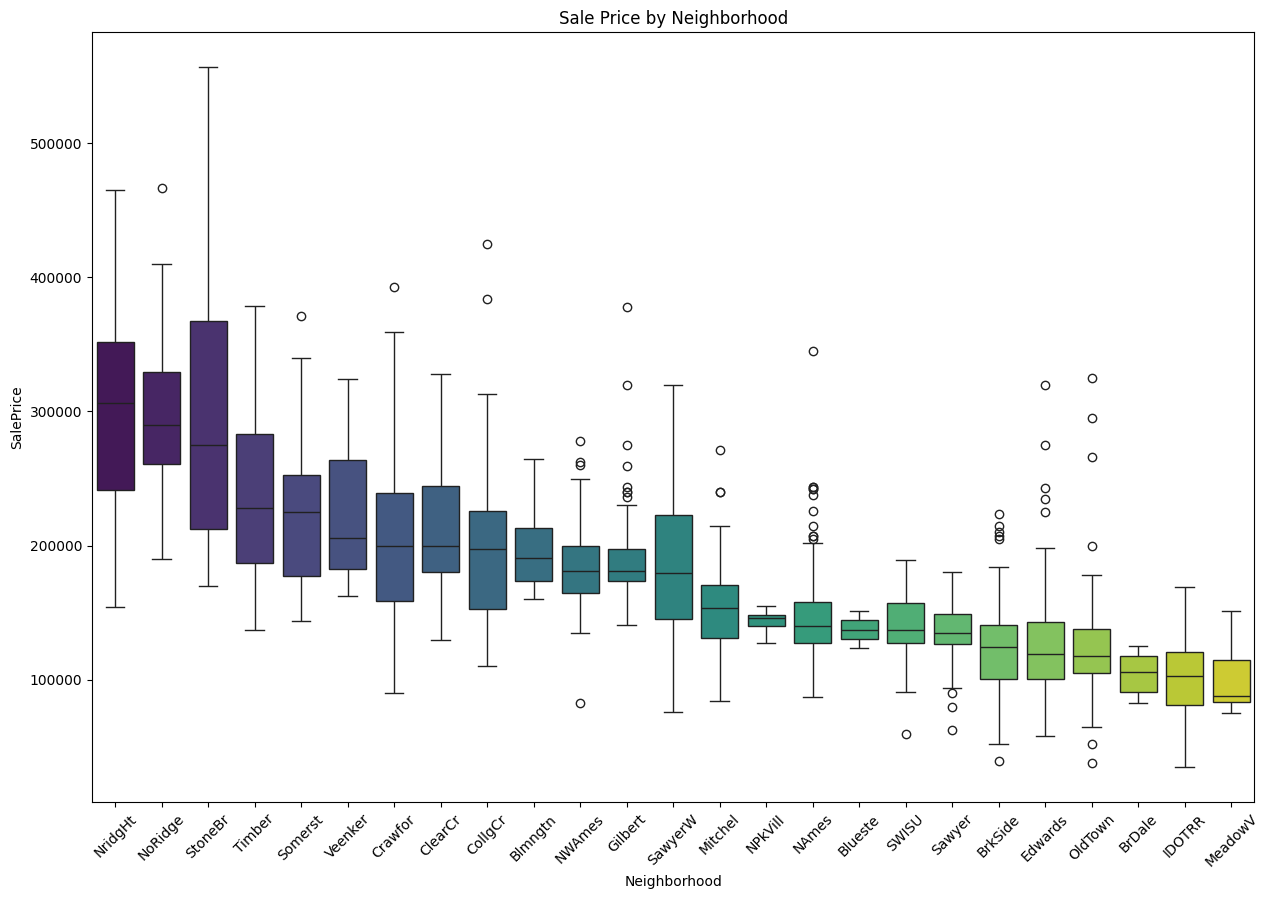

In [125]:
# Box plot of SalePrice by Neighborhood. 
# Color the box plot by SalePrice median and show legend.
# Re-order the x-axis labels to match the median SalePrice by descending order.
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df_dropna_clean2, x='Neighborhood', y='SalePrice', order=train_df_dropna_clean2.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Sale Price by Neighborhood')
plt.show()

The first step is to calculate the effect size for each categorical variable using the eta-squared (η2) statistic. The eta-squared statistic measures the proportion of variance in the dependent variable (SalePrice) that can be attributed to the independent variable (categorical variable).

The effect size analysis reveals that the top 10 categorical variables with the highest effect sizes are as follows: Neighborhood, ExterQual, KitchenQual, BsmtQual, GarageFinish, HeatingQC, Foundation, CentralAir, PavedDrive, and SaleType. These variables have a strong association with SalePrice, as they explain a significant proportion of the variance in the target variable. The two-group variable, CentralAir, has the highest effect size, indicating a strong relationship with SalePrice. 

In addition, the effect size analysis provides valuable insights into the categorical variables that are most relevant for predicting house prices in Ames, Iowa. 

### Correlation between numeric variables and sale prices 

In [103]:
numeric_vars = train_df_dropna_clean2.select_dtypes(include=[np.number]) # Select numeric variables

In [104]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Assuming numeric_vars is already defined and contains the numeric variables

# Function to compute Spearman correlation matrix and p-values matrix
def spearman_corr_pvalues(df):
    cols = df.columns
    n = len(cols)
    corr_matrix = np.zeros((n, n))
    pval_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            corr, pval = spearmanr(df[cols[i]], df[cols[j]])
            corr_matrix[i, j] = corr
            pval_matrix[i, j] = pval
    
    corr_df = pd.DataFrame(corr_matrix, index=cols, columns=cols)
    pval_df = pd.DataFrame(pval_matrix, index=cols, columns=cols)
    
    return corr_df, pval_df

# Calculate Spearman correlation matrix and p-values matrix
spearman_corr_matrix, spearman_pval_matrix = spearman_corr_pvalues(numeric_vars)

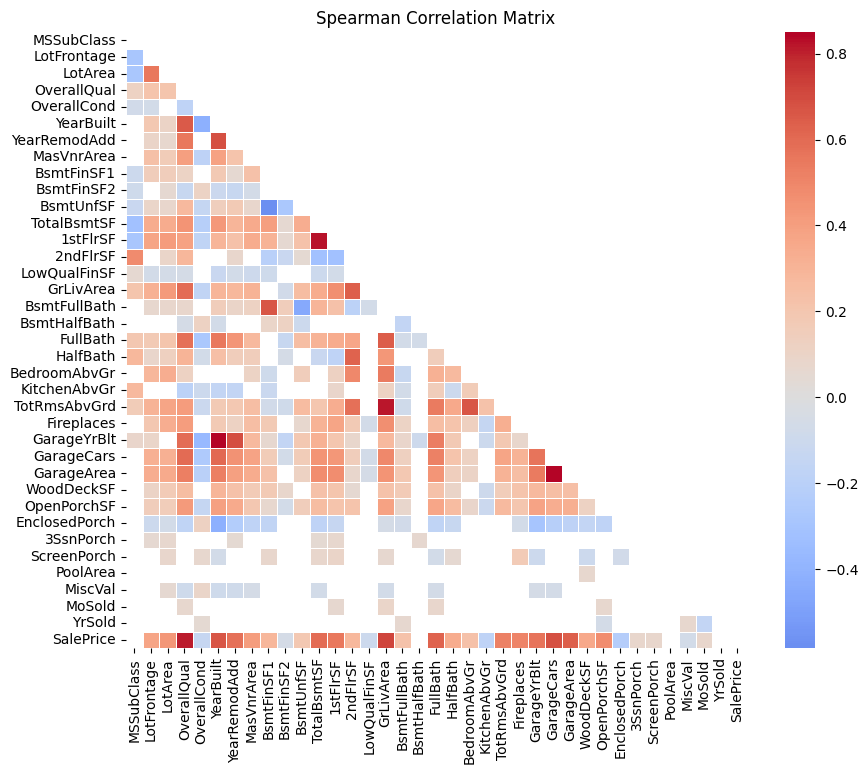

In [105]:
# Create heatmap for the correlation matrix 
# Mask cells with p-values greater than 0.05 
mask = spearman_pval_matrix > 0.05
spearman_corr_matrix_masked = spearman_corr_matrix.copy() 
spearman_corr_matrix_masked[mask] = np.nan 

# Create a mask for the upper triangle
mask2 = np.triu(np.ones_like(spearman_corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix_masked, annot=False, cmap='coolwarm', center=0, mask=mask2, linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show() 



In [126]:
# Find the variables that are highly correlated with SalePrice
high_corr_vars = spearman_corr_matrix
high_corr_vars = high_corr_vars['SalePrice']
high_corr_vars = high_corr_vars[abs(high_corr_vars) > 0.5]
high_corr_vars = high_corr_vars.sort_values(ascending=False)
high_corr_vars = high_corr_vars.drop('SalePrice') # Remove SalePrice from the list 

# Add columns names to the data frame, with first column as variable and second column as correlation value
high_corr_vars = high_corr_vars.reset_index()
high_corr_vars.columns = ['variable', 'correlation']  

# Create a dictionary with variable names as keys and descriptions as values
var_description = {}
for line in data_description:
    if ':' in line:
        key = line.split(':')[0]
        value = line.split(':')[1].strip()
        var_description[key] = value

# Add a column that contains variable description from the data_description.txt file
high_corr_vars['description'] = high_corr_vars['variable'].map(var_description)

# Display the data frame by Eta squared in descending order
high_corr_vars.sort_values(by="correlation", ascending=False).to_csv('data/high_corr_vars.csv', index=False) 

The correlation analysis reveals that the top 10 numeric variables with the highest correlation coefficients are as follows: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, and YearRemodAdd. These variables have a strong positive correlation with SalePrice, indicating that they are important predictors of house prices in Ames, Iowa. 

## Encode Categorical Variables 

In [107]:
# Convert categorical variables into dummy variables 
train_df_dropna_clean2_dummy = pd.get_dummies(train_df_dropna_clean2, drop_first=True) 
train_df_dropna_clean2_dummy.head() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


## Scaling and Normalization 

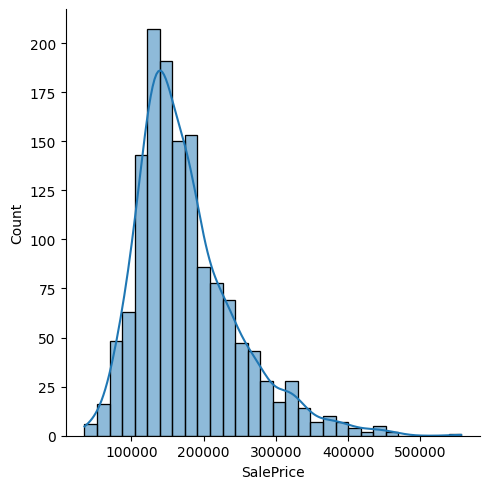

In [108]:
# Histogram and normal probability plot for SalePrice 
sns.displot(train_df_dropna_clean2['SalePrice'], bins=30, kde=True) 
plt.show() 

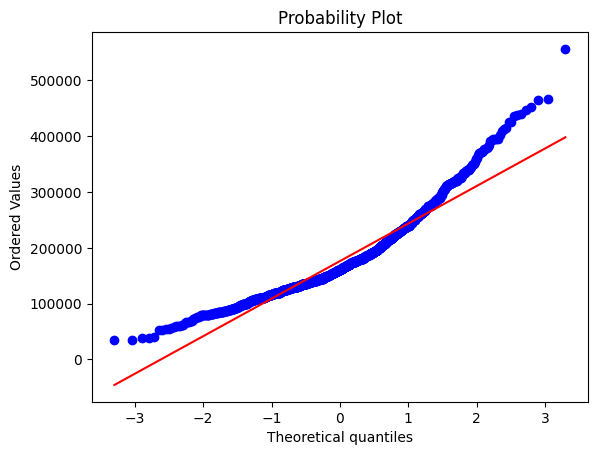

In [109]:
# Normal probability plot 
stats.probplot(train_df_dropna_clean2['SalePrice'], plot=plt) 
plt.show() 

In [110]:
# Log transformation of SalePrice
train_df_dropna_clean2['SalePrice_log'] = np.log(train_df_dropna_clean2['SalePrice']) 

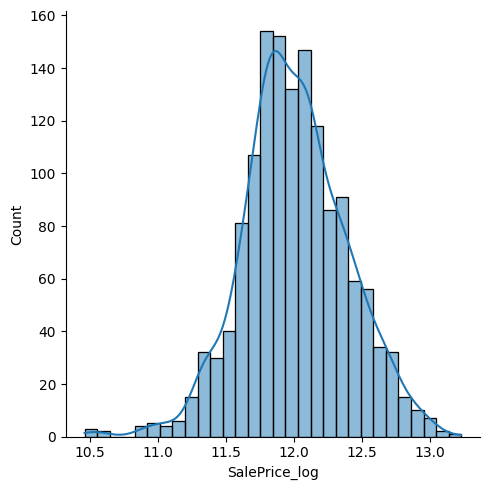

In [111]:
# Histogram and normal probability plot for SalePrice_log
sns.displot(train_df_dropna_clean2['SalePrice_log'], bins=30, kde=True)
plt.show()

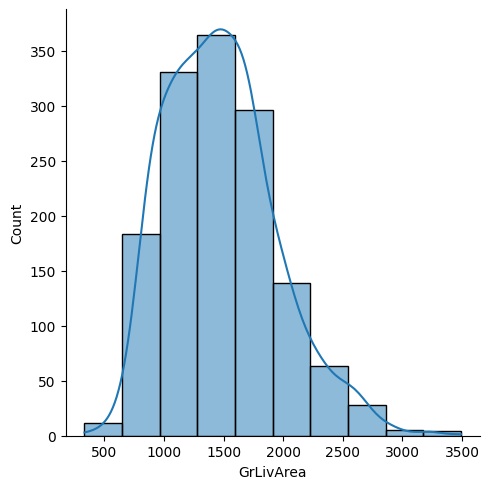

In [112]:
# Histogram for 'GrLivArea' 
sns.displot(train_df_dropna_clean2['GrLivArea'], bins=10, kde=True) 
plt.show() 

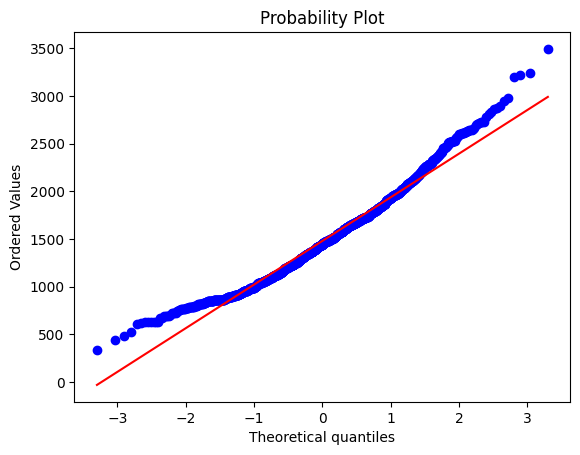

In [113]:
# Normal probability plot for 'GrLivArea' 
stats.probplot(train_df_dropna_clean2['GrLivArea'], plot=plt) 
plt.show() 

The variable 'GrLivArea' is not normally distributed. The Q-Q plot shows that the data points do not fall on the straight line. 

I will apply a log transformation to 'GrLivArea' to make it more normally distributed.

In [114]:
# Apply log transformation to 'GrLivArea' 
train_df_dropna_clean2['GrLivArea_log'] = np.log(train_df_dropna_clean2['GrLivArea']) 

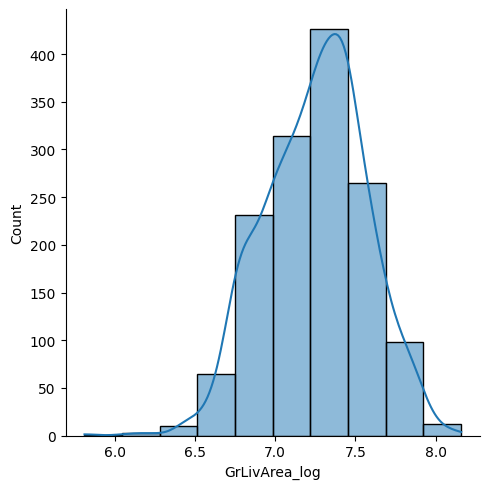

In [115]:
# Histogram and normal probability plot for 'GrLivArea_log'
sns.displot(train_df_dropna_clean2['GrLivArea_log'], bins=10, kde=True)
plt.show() 

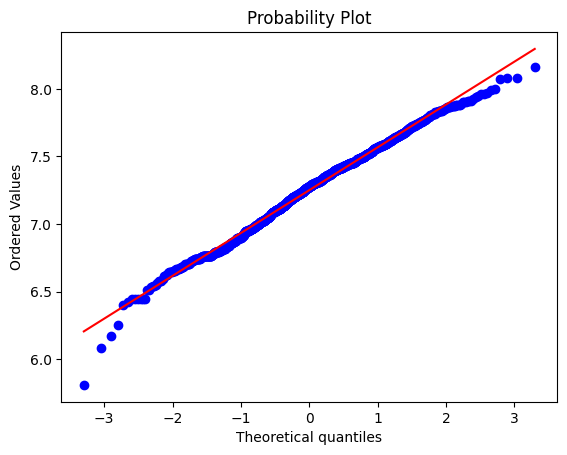

In [116]:
# Normal probability plot for 'GrLivArea_log' 
stats.probplot(train_df_dropna_clean2['GrLivArea_log'], plot=plt) 
plt.show() 

Investigate the relationship between 'GrLivArea' and 'SalePrice' to check for homoscedasticity and linearity. 

/var/folders/b8/9ymtxc2j7rb00xx34s753cwc0000gn/T/ipykernel_33643/3695073131.py:4: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=train_df_dropna_clean2, x='GrLivArea', y='SalePrice', kind='reg', ax=axes[0])
/var/folders/b8/9ymtxc2j7rb00xx34s753cwc0000gn/T/ipykernel_33643/3695073131.py:9: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=train_df_dropna_clean2, x='GrLivArea_log', y='SalePrice_log', kind='reg', ax=axes[1])


Text(0, 0.5, 'SalePrice_log')

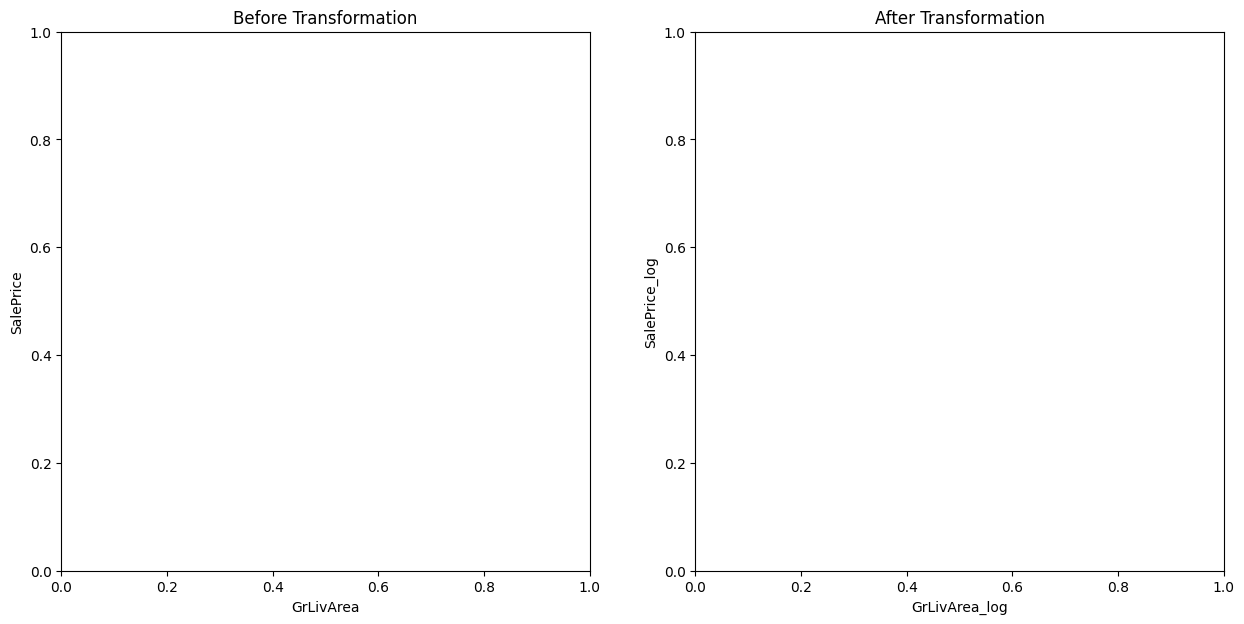

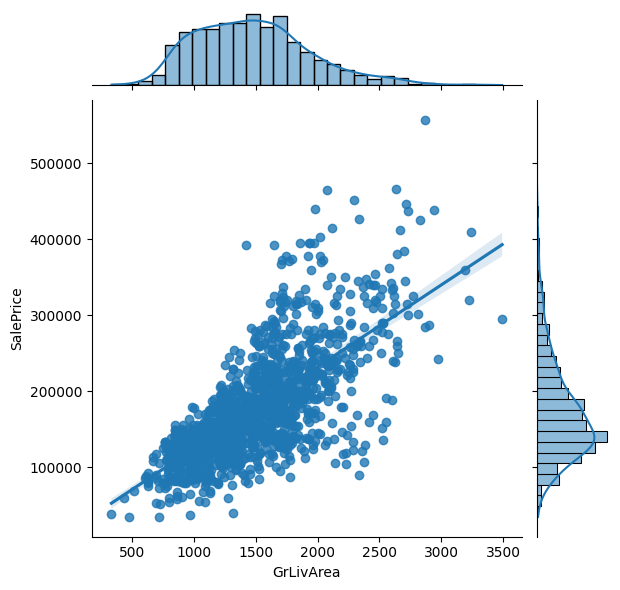

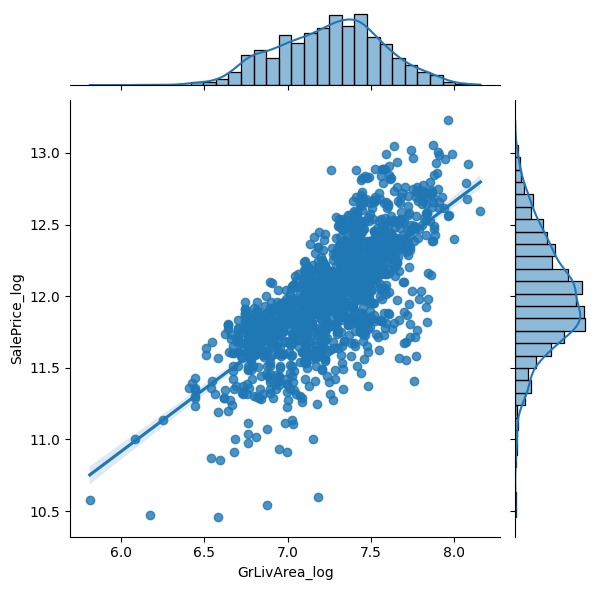

In [ ]:
# Combine the two scatter plots - before and after transformation side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.jointplot(data=train_df_dropna_clean2, x='GrLivArea', y='SalePrice', kind='reg', ax=axes[0])
axes[0].set_title('Before Transformation')
axes[0].set_xlabel('GrLivArea')
axes[0].set_ylabel('SalePrice')

sns.jointplot(data=train_df_dropna_clean2, x='GrLivArea_log', y='SalePrice_log', kind='reg', ax=axes[1])
axes[1].set_title('After Transformation')
axes[1].set_xlabel('GrLivArea_log')
axes[1].set_ylabel('SalePrice_log')




Intercept: 16944.89212068476
Coefficient: [107.62504592]


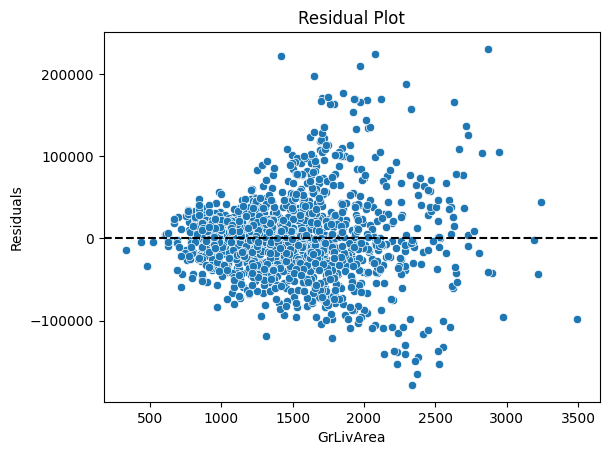

In [118]:
# Build a linear regression model with 'GrLivArea' as the predictor and 'SalePrice' as the target variable 
# Import the linear regression model
from sklearn.linear_model import LinearRegression

# Create an instance of the linear regression model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(train_df_dropna_clean2[['GrLivArea']], train_df_dropna_clean2['SalePrice']) 

# Print the coefficients
print('Intercept:', linear_reg.intercept_)
print('Coefficient:', linear_reg.coef_)
# Make predictions
predictions = linear_reg.predict(train_df_dropna_clean2[['GrLivArea']]) 

# Calculate the residuals
residuals = train_df_dropna_clean2['SalePrice'] - predictions

# Plot the residuals
sns.scatterplot(x=train_df_dropna_clean2['GrLivArea'], y=residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('GrLivArea')
plt.ylabel('Residuals')
plt.show()


## Feature Analysis and Selection 

Feature analysis and selection: Identify features with low variance or high multicollinearity and consider removing them 

In [119]:
# Using Pandas to calculate variance 
numeric_features = train_df_dropna_clean2.select_dtypes(include=[np.number]) # Select numeric variables

# Calculate variance for each numeric variable 
variance_numeric_features = numeric_features.var() 
# print(variance_numeric_features)
low_variance_numeric_features = variance_numeric_features[variance_numeric_features < 0.01].index
print(low_variance_numeric_features)  # Variables with low variance 


Index([], dtype='object')


In [120]:
# Identify features with high multicollinearity 

# Compute the correlation matrix 
corr_matrix = numeric_features.corr().abs() 

# Identify pairs of features with correlation greater than 0.8 
high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y] 

# Remove pairs with 'SalePrice' or 'SalePrice_log'
high_corr_var = [x for x in high_corr_var if 'SalePrice' not in x]
high_corr_var = [x for x in high_corr_var if 'SalePrice_log' not in x]
print(high_corr_var)  # Pairs of variables with high correlation

[('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', 'GrLivArea_log'), ('TotRmsAbvGrd', 'GrLivArea_log'), ('GarageCars', 'GarageArea')]


In [121]:
# Alternative method to identify features with high multicollinearity - Variance Inflation Factor (VIF) 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Create a data frame to store VIF 
vif_data = pd.DataFrame() 
vif_data["Feature"] = numeric_features.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(len(numeric_features.columns))] 

vif_data.sort_values(by="VIF", ascending=False).head(10)  # Display top 10 features with high VIF 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
12,1stFlrSF,inf
11,TotalBsmtSF,inf
15,GrLivArea,inf
14,LowQualFinSF,inf
13,2ndFlrSF,inf
8,BsmtFinSF1,inf
9,BsmtFinSF2,inf
10,BsmtUnfSF,inf
35,YrSold,3.752511e+04
37,SalePrice_log,2.654911e+04


VIF Interpretation:
- VIF = 1: No correlation with other variables
- VIF between 1 and 5: Moderate correlation (usually acceptable)
- VIF > 5: High correlation (multicollinearity is likely present)
- VIF > 10: Severe multicollinearity (should be addressed)

VIF values indicate how much the variance of a feature’s coefficient is inflated due to multicollinearity. 

## Summary for the Exploratory Data Analysis (EDA)

Key Patterns and Insights

The analysis of the Ames housing dataset reveals several patterns influencing house prices:
	1.	Top Predictive Features: Numerical variables like OverallQual (overall material and finish quality), GrLivArea (above-grade living area), and GarageCars (garage car capacity) show strong positive correlations with sale prices. Similarly, categorical variables like Neighborhood and KitchenQual (kitchen quality) demonstrate significant associations.
	2.	Distributions: The target variable SalePrice is right-skewed, suggesting a log transformation may enhance predictive modeling. Variables like GrLivArea benefit from similar treatment to normalize distributions.
	3.	Outliers and Missing Data: Outliers were identified and addressed, improving data quality and enhancing the robustness of future models. Missing values, particularly in categorical variables like PoolQC and MiscFeature, were imputed using mode or removed if sparsity exceeded 30%.

Real-World Applications

- Property Appraisal: Insights can aid realtors and appraisers in providing accurate property valuations based on quality, location, and other key features.
- Urban Planning and Development: Understanding the impact of neighborhood attributes and property characteristics can guide city planners in designing areas to enhance housing value.
- Market Strategy for Builders: Developers can optimize investments by prioritizing features like quality finishes and ample garage space, known to significantly affect sale prices.

Summary of Findings and Next Steps

This EDA establishes a solid foundation for predictive modeling by addressing data anomalies, identifying critical predictors, and preprocessing effectively. The findings suggest that:
	•	Numerical features like OverallQual and categorical features like Neighborhood are critical for model training.
	•	Skewed distributions and multicollinearity require thoughtful treatment during feature engineering.

Next Steps:
	1.	Feature Engineering: Create interaction terms and derive meaningful metrics to improve prediction accuracy.
	2.	Model Selection and Tuning: Experiment with machine learning models (e.g., regression, tree-based methods) to capture nonlinear relationships and interactions.
	3.	Validation: Perform rigorous cross-validation and hyperparameter tuning to ensure model generalizability.

This analysis provides actionable insights to optimize predictive performance and guide real-world decision-making.